In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
mov_df = pd.read_csv('data/data_Mov_Bogota_2019_2.csv')

In [3]:
mov_df.head(5)

,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,SHAPELEN,Shape__Length
0,537921,1001007,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1068,1,29.920095,07:00:00,Viernes,September,CL24,KR68B;KR60,NaN,NaN
1,537922,1002040,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1396,1,44.768136,07:00:00,Viernes,September,CL26,KR66A;AV.ROJAS,NaN,NaN
2,537923,1000051,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,1458,1,16.267973,07:00:00,Viernes,September,CL116,KR15;KR11,NaN,NaN
3,537924,1002038,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,506,1,52.683532,07:00:00,Viernes,September,CL26,GOBERNACION;CAN,NaN,NaN
4,537925,1001009,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,2019,7,732,1,9.281605,07:00:00,Viernes,September,CL63,KR77A;KR72,NaN,NaN


In [4]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16267959 entries, 0 to 16267958
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   OBJECTID       int64  
 1   TID            int64  
 2   INICIO         object 
 3   FIN            object 
 4   AÑO            int64  
 5   HORA           int64  
 6   DISTANCE       int64  
 7   TYPE           int64  
 8   VEL_PROMEDIO   float64
 9   CUARTO_HORA    object 
 10  DIA_SEMANA     object 
 11  MES            object 
 12  NAME_FROM      object 
 13  NAME_TO        object 
 14  SHAPELEN       float64
 15  Shape__Length  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 1.9+ GB


## Visión General del Dataset

In [5]:
mov_df.columns

Index(['OBJECTID', 'TID', 'INICIO', 'FIN', 'AÑO', 'HORA', 'DISTANCE', 'TYPE',
       'VEL_PROMEDIO', 'CUARTO_HORA', 'DIA_SEMANA', 'MES', 'NAME_FROM',
       'NAME_TO', 'SHAPELEN', 'Shape__Length'],
      dtype='object')

In [6]:
mov_df.dtypes

OBJECTID           int64
TID                int64
INICIO            object
FIN               object
AÑO                int64
HORA               int64
DISTANCE           int64
TYPE               int64
VEL_PROMEDIO     float64
CUARTO_HORA       object
DIA_SEMANA        object
MES               object
NAME_FROM         object
NAME_TO           object
SHAPELEN         float64
Shape__Length    float64
dtype: object

In [7]:
mov_df.describe()

,OBJECTID,TID,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,SHAPELEN,Shape__Length
count,1.626796e+07,1.626796e+07,1.626796e+07,1.626796e+07,1.626796e+07,1.626796e+07,1.626796e+07,2.193928e+06,2.007498e+06
mean,1.642201e+06,8.200344e+05,2.019066e+03,1.159962e+01,1.528041e+03,8.192896e-01,2.779101e+01,1.973756e-02,1.451430e-02
std,1.076393e+06,3.850931e+05,2.482064e-01,6.904034e+00,2.549428e+03,3.847781e-01,1.372686e+01,9.332189e-02,5.030136e-02
min,1.000000e+00,1.000000e+00,2.019000e+03,0.000000e+00,0.000000e+00,0.000000e+00,9.145946e-01,1.448918e-03,1.448918e-03
25%,8.294860e+05,1.000067e+06,2.019000e+03,6.000000e+00,5.620000e+02,1.000000e+00,1.735914e+01,5.254766e-03,5.029943e-03
50%,1.534209e+06,1.000678e+06,2.019000e+03,1.200000e+01,8.450000e+02,1.000000e+00,2.509016e+01,7.971313e-03,7.612114e-03
75%,2.147090e+06,1.001053e+06,2.019000e+03,1.800000e+01,1.313000e+03,1.000000e+00,3.566900e+01,1.233273e-02,1.179775e-02
max,4.724021e+06,1.002369e+06,2.020000e+03,2.300000e+01,3.275900e+04,1.000000e+00,9.999000e+01,1.414214e+00,1.414214e+00


In [8]:
## Selección de variables 
mov_df = mov_df[['OBJECTID', 'TID', 'INICIO', 'FIN',
                 'HORA', 'DISTANCE', 'TYPE', 'VEL_PROMEDIO', 
                 'DIA_SEMANA', 'MES', 'NAME_FROM', 'NAME_TO']]

## Análisis Unidimensional de las Variables

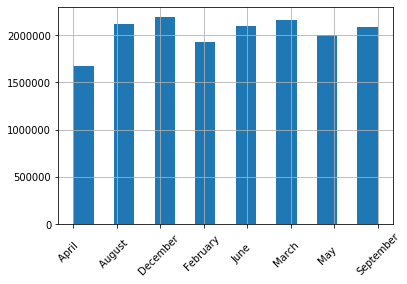

In [9]:
## Conteo de la ocurrencia de una variable y un valor

# Conteo de la movilidad en cada mes
mov_df_sorted = mov_df.sort_values('MES')
mov_df_sorted['MES'].hist(bins=15, xrot=45, grid=True)
##plt.xticks(rotation=45)

In [10]:
mov_df['DIA_SEMANA'].value_counts(normalize=True)

Martes       0.147475
Sabado       0.147405
Viernes      0.146042
Domingo      0.143240
Lunes        0.142752
Jueves       0.139367
Miercoles    0.133719
Name: DIA_SEMANA, dtype: float64

In [11]:
mov_df['NAME_FROM'].value_counts()

KR7           918303
NQS           811327
AV.CARACAS    681469
KR72          668881
AV.P.MAYO     628137
               ...  
KR61SUR        17114
KR27;TV28      11029
KR68SUR         8585
CL153           8584
KR19C           8498
Name: NAME_FROM, Length: 105, dtype: int64

In [12]:
mov_df['NAME_TO'].value_counts()

AV.CARACAS;KR7     152557
KR7;KR11           132544
KR11;KR7           112619
KR15;KR11          111948
KR7;AV.CARACAS     107654
                    ...  
CL37SUR;CL40SUR      1034
CL27;CL24             799
KR14;KR5              781
TV79D;KR91             61
CL127;CL100            25
Name: NAME_TO, Length: 716, dtype: int64

In [13]:
mov_df

,OBJECTID,TID,INICIO,FIN,HORA,DISTANCE,TYPE,VEL_PROMEDIO,DIA_SEMANA,MES,NAME_FROM,NAME_TO
0,537921,1001007,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,1068,1,29.920095,Viernes,September,CL24,KR68B;KR60
1,537922,1002040,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,1396,1,44.768136,Viernes,September,CL26,KR66A;AV.ROJAS
2,537923,1000051,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,1458,1,16.267973,Viernes,September,CL116,KR15;KR11
3,537924,1002038,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,506,1,52.683532,Viernes,September,CL26,GOBERNACION;CAN
4,537925,1001009,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,732,1,9.281605,Viernes,September,CL63,KR77A;KR72
...,...,...,...,...,...,...,...,...,...,...,...,...
16267954,2012318,1002036,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,1366,1,52.092345,Viernes,May,CL26,GOBERNACION;KR40
16267955,2012319,1001931,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,1399,1,10.503962,Viernes,May,"KR24,TV24",CL45;CL57
16267956,2012320,1002030,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,1212,1,47.719449,Viernes,May,AV.SUBA,21.ANGELES;CL136
16267957,2012321,1001940,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,947,1,33.260065,Viernes,May,CL43SUR,KR86;KR80


## Análisis Multidimensional de las Variables

Velocidad promedio versus la trayectoria realizada.

La trayectoria se va a definir como la concatenación entre NAME_FROM y NAME_TO.

In [14]:
mov_df['TRAYEC'] = mov_df['NAME_FROM'] + ' - ' +mov_df['NAME_TO']

In [15]:
mov_df['TRAYEC'].value_counts()

AV.AMERICAS - KR74;KR80       45019
KR6 - AV.P.MAYO;CL10ASUR      44467
CL1,KR27 - KR25;AV.P.MAYO     44281
AV.CORDOBA - CL127;AV.SUBA    44185
KR27,CL1 - AV.P.MAYO;KR25     44156
                              ...  
KR15 - CL116;CL106              110
KR15 - CL116;CL127               96
KR15 - CL106;CL116               78
KR86 - TV79D;KR91                61
KR15 - CL127;CL100               25
Name: TRAYEC, Length: 844, dtype: int64

Mediana de la velocidad promedio en cada trayecto. VEL_PROMEDIO que es más común en cada trayecto:

In [16]:
medianVel_Tray = mov_df.groupby('TRAYEC').median()['VEL_PROMEDIO']
medianVel_Tray

TRAYEC
AUTONORTE - ALCALA;CL146               48.308184
AUTONORTE - ALCALA;PRADO               53.062327
AUTONORTE - CARDIO.INFANTIL;CL146      53.737773
AUTONORTE - CARDIO.INFANTIL;TOBERIN    45.189466
AUTONORTE - CL100;PEPE.SIERRA          43.616572
                                         ...    
TV42 - CL6;CL2C                        29.159781
TV42,KR50 - CL6;CL33SUR                26.385499
TV80A - AV.AMERICAS;KR80               16.283529
TV85,CL64BBIS - CL63;KR86              19.004073
TV85,CL65BIS,KR85J - CL63;KR86         15.594021
Name: VEL_PROMEDIO, Length: 844, dtype: float64

## Análisis de Texto

In [17]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [18]:
list_lite_NAME_TO = mov_df['NAME_TO'].value_counts().sort_values(ascending=False).index[0:10]
list_lite_NAME_TO

Index(['AV.CARACAS;KR7', 'KR7;KR11', 'KR11;KR7', 'KR15;KR11', 'KR7;AV.CARACAS',
       'KR11;KR15', 'KR15;KR19', 'KR19;KR15', 'KR10;AV.CARACAS',
       'AV.CARACAS;KR10'],
      dtype='object')

In [19]:
mov_df_filter_lite_NAME_TO = mov_df[mov_df['NAME_TO'].isin(list_lite_NAME_TO)]
mov_df_filter_lite_NAME_TO

,OBJECTID,TID,INICIO,FIN,HORA,DISTANCE,TYPE,VEL_PROMEDIO,DIA_SEMANA,MES,NAME_FROM,NAME_TO,TRAYEC
2,537923,1000051,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,1458,1,16.267973,Viernes,September,CL116,KR15;KR11,CL116 - KR15;KR11
18,537939,1000069,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,526,1,30.151908,Viernes,September,CL92,KR11;KR15,CL92 - KR11;KR15
26,537947,1000067,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,527,1,25.910706,Viernes,September,CL94,KR11;KR15,CL94 - KR11;KR15
30,537951,1000029,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,455,1,20.228330,Viernes,September,CL72,KR7;KR11,CL72 - KR7;KR11
34,537955,1000068,2019/09/06 07:00:00+00,2019/09/06 07:15:00+00,7,528,1,8.352791,Viernes,September,CL94,KR15;KR11,CL94 - KR15;KR11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267728,2012092,1000334,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,625,1,24.662911,Viernes,May,CL11SUR,KR10;AV.CARACAS,CL11SUR - KR10;AV.CARACAS
16267780,2012144,1000668,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,1027,1,26.556696,Viernes,May,AV.P.MAYO,KR10;AV.CARACAS,AV.P.MAYO - KR10;AV.CARACAS
16267804,2012168,1000667,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,1032,1,32.838606,Viernes,May,AV.P.MAYO,AV.CARACAS;KR10,AV.P.MAYO - AV.CARACAS;KR10
16267865,2012229,1001954,2019/05/31 23:45:00+00,2019/06/01 00:00:00+00,23,449,1,26.961462,Viernes,May,CL100,KR15;KR19,CL100 - KR15;KR19


In [20]:
textos_destino = ''
for row in mov_df_filter_lite_NAME_TO['NAME_TO']:
    textos_destino = textos_destino + ' ' + row

In [23]:
## to check the ModuleNotFoundError: No module named 'wordcloud'
## install:
## /anaconda3/bin/python -m pip install wordcloud
import sys
print(sys.executable)

/home/ivan/anaconda3/bin/python


In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

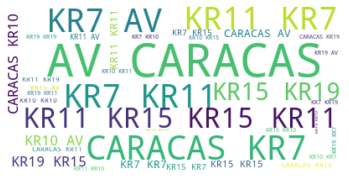

In [25]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_destino)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()